<a href="https://colab.research.google.com/github/momenashra/Recommandation-systems/blob/main/Recommending_courses_using_LLM_Embeddding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libararies and Reading data


In [1]:
import pandas as pd
import gensim
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import os
import re
import html
import string
import unicodedata
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt_tab')
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/MyDrive/EdX.csv")

# indexing Data

In [5]:
# DATA PREPROCESSING
# Create unique IDs and set as index
df['id'] = range(len(df))
df = df.set_index('id')


In [6]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Name                  0
University            0
Difficulty Level      0
Link                  0
About                 0
Course Description    0
dtype: int64


In [7]:
df

,Name,University,Difficulty Level,Link,About,Course Description
id,,,,,,
0,How to Learn Online,edX,Beginner,https://www.edx.org/course/how-to-learn-online,Learn essential strategies for successful onli...,"Designed for those who are new to elearning, t..."
1,Programming for Everybody (Getting Started wit...,The University of Michigan,Beginner,https://www.edx.org/course/programming-for-eve...,"This course is a ""no prerequisite"" introductio...",This course aims to teach everyone the basics ...
2,CS50's Introduction to Computer Science,Harvard University,Beginner,https://www.edx.org/course/cs50s-introduction-...,An introduction to the intellectual enterprise...,"This is CS50x , Harvard University's introduct..."
3,The Analytics Edge,Massachusetts Institute of Technology,Intermediate,https://www.edx.org/course/the-analytics-edge,"Through inspiring examples and stories, discov...","In the last decade, the amount of data availab..."
4,Marketing Analytics: Marketing Measurement Str...,"University of California, Berkeley",Beginner,https://www.edx.org/course/marketing-analytics...,This course is part of a MicroMasters® Program,Begin your journey in a new career in marketin...
...,...,...,...,...,...,...
715,Global China: From the Mongols to the Ming,Harvard University,Beginner,https://www.edx.org/course/global-china-from-t...,Explore the impact of the conquest dynasties a...,"In the 13th century, by force of arms, the Mon..."
716,Leaders in Citizen Security and Justice Manage...,Inter-American Development Bank,Intermediate,https://www.edx.org/course/leaders-in-citizen-...,"Learn about the latest in prevention, police a...",The high rates of crime and violence are two o...
717,Computational Neuroscience: Neuronal Dynamics ...,École polytechnique fédérale de Lausanne,Advanced,https://www.edx.org/course/computational-neuro...,This course explains the mathematical and comp...,What happens in your brain when you make a dec...


In [9]:
pip install sentence_transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 113.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 61.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [37]:
# Store course names separately
target = df['Name']
df.drop(columns=['Name'], inplace=True)

# LLM MODEL TRAINING


In [41]:
# Create training sentences by combining features
sentences = []
for _, row in df.iterrows():
    # Combine multiple features into single text
    combined_text = ' '.join([
        str(row['University']),
        str(row['Difficulty Level']),
        str(row['About']),
        str(row['Course Description'])
    ])
    # Tokenize and add to training data
    sentences.append(combined_text.lower())

In [42]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
embeddings = model.encode(sentences)
print(embeddings)


[[-0.02937656 -0.01228332  0.06587014 ...  0.04323198 -0.0957743
   0.04065457]
 [-0.08163968 -0.0480574   0.0075325  ...  0.09054238  0.00667952
  -0.01124063]
 [-0.03222768  0.00109336  0.03642318 ... -0.02112254 -0.0321427
  -0.00252905]
 ...
 [-0.02108816 -0.11786955  0.03793958 ...  0.11481111 -0.08827186
  -0.07337801]
 [ 0.06601042  0.04450912  0.11147982 ...  0.02450602 -0.05049181
   0.07858393]
 [-0.05067396 -0.00131348 -0.01760043 ...  0.04151222 -0.02231952
  -0.0345648 ]]


In [43]:
df

,University,Difficulty Level,Link,About,Course Description
id,,,,,
0,edX,Beginner,https://www.edx.org/course/how-to-learn-online,Learn essential strategies for successful onli...,"Designed for those who are new to elearning, t..."
1,The University of Michigan,Beginner,https://www.edx.org/course/programming-for-eve...,"This course is a ""no prerequisite"" introductio...",This course aims to teach everyone the basics ...
2,Harvard University,Beginner,https://www.edx.org/course/cs50s-introduction-...,An introduction to the intellectual enterprise...,"This is CS50x , Harvard University's introduct..."
3,Massachusetts Institute of Technology,Intermediate,https://www.edx.org/course/the-analytics-edge,"Through inspiring examples and stories, discov...","In the last decade, the amount of data availab..."
4,"University of California, Berkeley",Beginner,https://www.edx.org/course/marketing-analytics...,This course is part of a MicroMasters® Program,Begin your journey in a new career in marketin...
...,...,...,...,...,...
715,Harvard University,Beginner,https://www.edx.org/course/global-china-from-t...,Explore the impact of the conquest dynasties a...,"In the 13th century, by force of arms, the Mon..."
716,Inter-American Development Bank,Intermediate,https://www.edx.org/course/leaders-in-citizen-...,"Learn about the latest in prevention, police a...",The high rates of crime and violence are two o...
717,École polytechnique fédérale de Lausanne,Advanced,https://www.edx.org/course/computational-neuro...,This course explains the mathematical and comp...,What happens in your brain when you make a dec...


# EMBEDDING VISUALLY

In [44]:
# Access the tokenizer used by the model
tokenizer = model.tokenizer

# Get the vocabulary
vocab = tokenizer.get_vocab()

# Print the first 10 tokens in the vocabulary


In [45]:
embeddings.shape

(720, 384)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12488 (\N{KATAKANA LETTER TO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


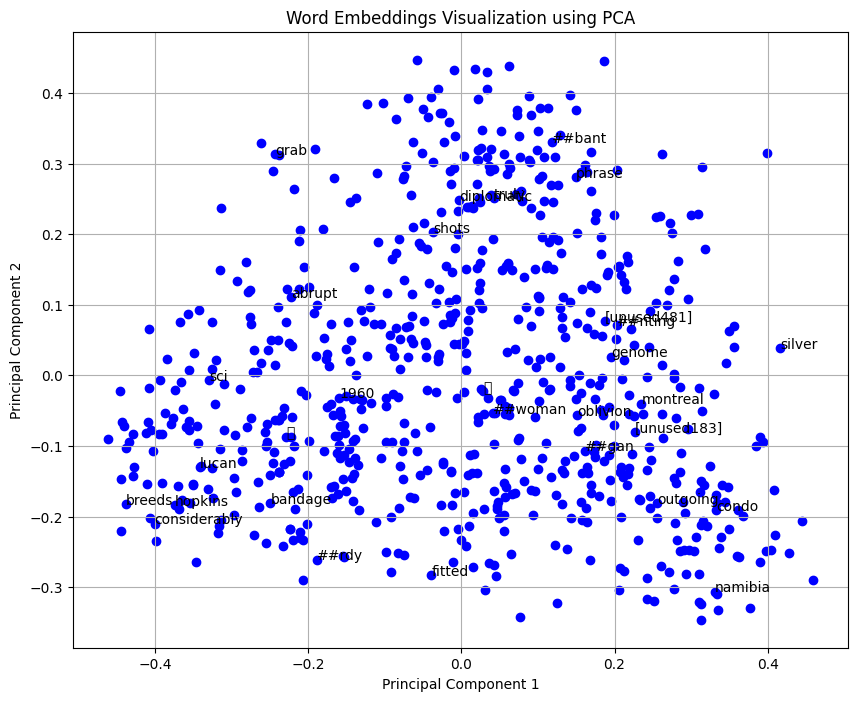

In [46]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Select 30 random words from the vocabulary
words = list(vocab.keys())[:30]

# Get the word embeddings for these words
# word_vectors = [model.wv[word] for word in words]

# Use PCA to reduce the word vectors to 2 dimensions
pca = PCA(n_components=2)
word_vectors_pca = pca.fit_transform(embeddings)

# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(word_vectors_pca[:, 0], word_vectors_pca[:, 1], c='blue')

# Annotate each point with the word
for i, word in enumerate(words):
    plt.annotate(word, xy=(word_vectors_pca[i, 0], word_vectors_pca[i, 1]))

# Display the plot
plt.title("Word Embeddings Visualization using PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid()
plt.show()

# SIMILARITY CALCULATION


In [47]:
# Create cosine similarity matrix
embeddings_matrix = np.vstack(embeddings)
cosine_sim = cosine_similarity(embeddings_matrix)

# Create index-to-course mapping
course_indices = pd.Series(df.index, index=target).drop_duplicates()

# 9. RECOMMENDATION FUNCTION
def recommend_courses(name, cosine_sim=cosine_sim, df=df, course_indices=course_indices):
    """Get top 10 similar courses using cosine similarity"""
    try:
        # Get index from course name
        idx = course_indices[name]

        # Get similarity scores
        sim_scores = list(enumerate(cosine_sim[idx]))

        # Sort by similarity
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

        # Get top 10 similar courses (excluding self)
        sim_scores = sim_scores[1:11]

        # Extract indices
        course_indices = [i[0] for i in sim_scores]

        return target.iloc[course_indices]

    except KeyError:
        return f"Course '{name}' not found in database"


In [49]:
Courses_indices = pd.Series(df.index, index=target).drop_duplicates()

# Function to recommend courses based on cosine similarity
def recommend_Courses(name, cosine_sim=cosine_sim, df=df, Courses_indices=Courses_indices):
    # Get the index of the course that matches the title
    idx = Courses_indices[name]

    # Get the pairwise similarity scores of all courses with that course
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the courses based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the indices of the 10 most similar courses
    sim_scores = sim_scores[1:11]

    # Get the course indices
    Courses_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar courses
    return target.iloc[Courses_indices]

# 10. EXAMPLE USAGE
# Test recommendation system
sample_course = target[2]
print(f"\nRecommendations for: {sample_course}")
print(recommend_courses(sample_course))


Recommendations for: CS50's Introduction to Computer Science
id
125    CS50's Computer Science for Business Professio...
21     CS50's Web Programming with Python and JavaScript
267                             How to Code: Simple Data
693        Software Construction: Object-Oriented Design
69                                  Computer Science 101
31                             Using Python for Research
19     CS50's Introduction to Artificial Intelligence...
668                            How to Code: Complex Data
289                    Software Development Fundamentals
190    Introduction to Java Programming: Starting to ...
Name: Name, dtype: object
